In [1]:
import pandas as pd

wine = pd.read_csv('../data/wine.csv') # pandas에 read_csv를 호출하여 해당 주소에 있는 데이터를 가져옴
print(wine.info(), wine.head()) # 데이터를 확인하기 위해 info()함수를 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None    alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


In [2]:
wine.describe() # 전부 수치형 데이터이므로 describe로 파악 가능하다.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [3]:
wine['class'].unique() # 유니크한 값이 2가지 0과 1이 들어가있는 범주형 변수다. 그럼 회귀 모델보단 분류 모델에 더 적합한 데이터다.

array([0., 1.])

In [4]:
data = wine[['alcohol', 'sugar', 'pH']] # 맞춰야 할 데이터를 제외하고 데이터를 재구성한다.
target = wine['class'] # 우리가 맞춰야 할 데이터를 따로 빼준다.(target이라는 변수로)

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # train과 test 데이터를 8 : 2의 비율로 나눈다.

In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(criterion = 'entropy') #  criterion은 gini, entropy 둘중 하나를 선택 할 수 있다. default값은 gini이다.
decision_tree.fit(train_input, train_target) # 불러온 모델에 train데이터를 적합시킨다.

print('학습데이터 성능 :',decision_tree.score(train_input,train_target))
print('테스트데이터 성능 :',decision_tree.score(test_input,test_target))

학습데이터 성능 : 0.996728882047335
테스트데이터 성능 : 0.8853846153846154


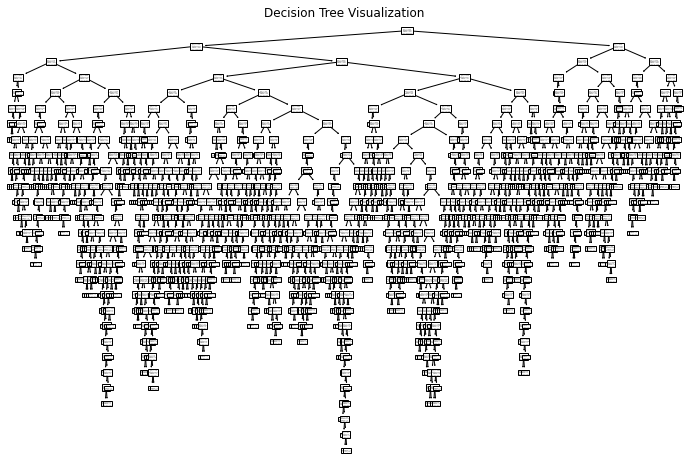

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (12,8)) # figure를 생성하는데 가로 12, 세로 8 크기로 설정

plot_tree(decision_tree) # plot_tree안에 모델을 넣어주면 된다
plt.title('Decision Tree Visualization')
plt.show()

In [9]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) # max_depth는 트리의 깊이를 3으로 제한 한다는 뜻이다.
decision_tree.fit(train_input, train_target)

print('학습데이터 성능 :',decision_tree.score(train_input,train_target))
print('테스트데이터 성능 :',decision_tree.score(test_input,test_target))

학습데이터 성능 : 0.8408697325380027
테스트데이터 성능 : 0.8553846153846154


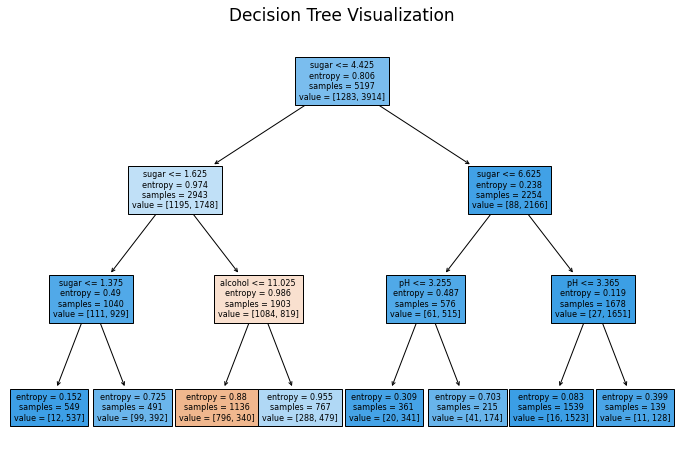

In [10]:
plt.figure(figsize = (12,8)) # figure를 설정하는데 가로 12, 세로 8 크기의 figure를 생성

plot_tree(decision_tree, 
          filled = True, 
          feature_names = ['alcohol', 'sugar', 'pH'], 
          fontsize = 8)
plt.title('Decision Tree Visualization', fontsize = 17)
plt.show()

In [12]:
print(decision_tree.feature_importances_)

[0.09148191 0.88704019 0.02147791]


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', 
                            n_estimators = 100, 
                            max_depth = 4, 
                            random_state = 123456) #  n_estimators의 default 값은 100

rf.fit(train_input, train_target)
print('학습데이터 성능 :',rf.score(train_input, train_target))
print('테스트데이터 성능 :',rf.score(test_input, test_target))

학습데이터 성능 : 0.8410621512411006
테스트데이터 성능 : 0.8615384615384616


In [14]:
rf.estimators_[0] # 첫번째 Decision Tree의 정보

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       random_state=545331265)

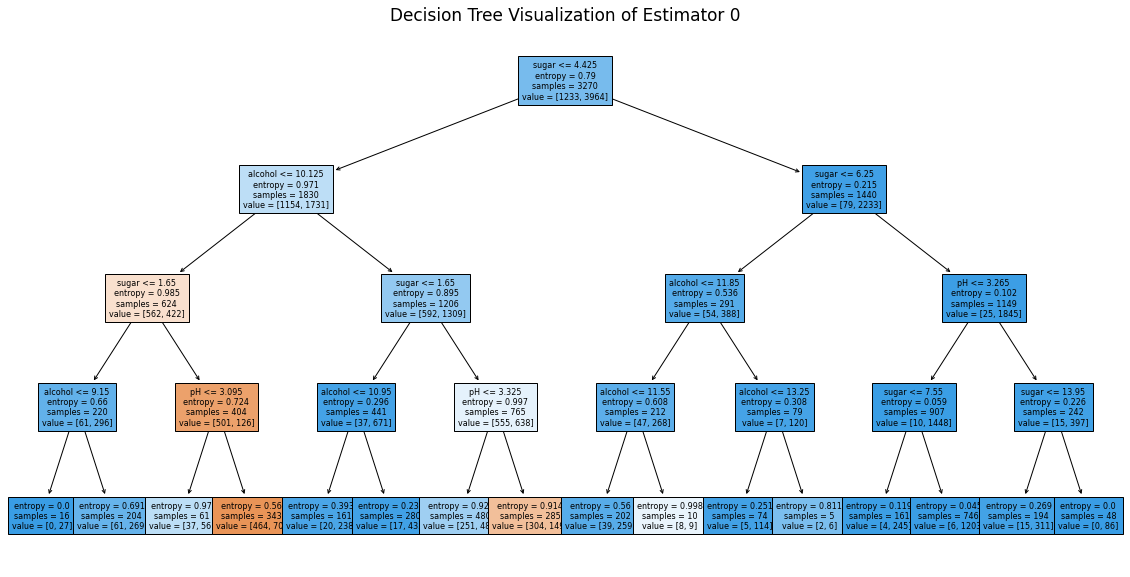

In [15]:
f, ax = plt.subplots(figsize = (20,10))
plot_tree(rf.estimators_[0], 
          feature_names = ['alcohol', 'sugar', 'pH'], 
          filled = True, 
          fontsize = 8)
plt.title('Decision Tree Visualization of Estimator 0', fontsize = 17)
plt.show()

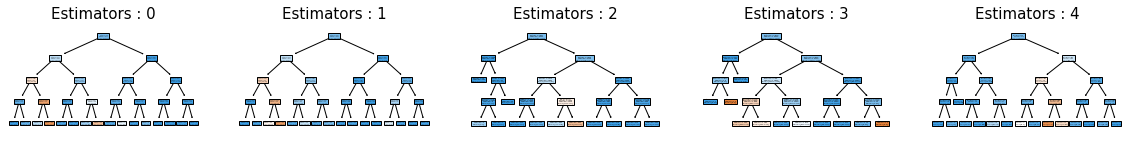

In [16]:
f, ax = plt.subplots(1,5, figsize = (20, 2))

for i in range(5):
  plot_tree(rf.estimators_[i],
            feature_names = ['alcohol', 'sugar', 'pH'],
            filled = True,
            ax = ax[i])
  ax[i].set_title('Estimators : '+str(i), fontsize = 15)

In [17]:
print(rf.feature_importances_)

[0.12322695 0.58913179 0.28764126]


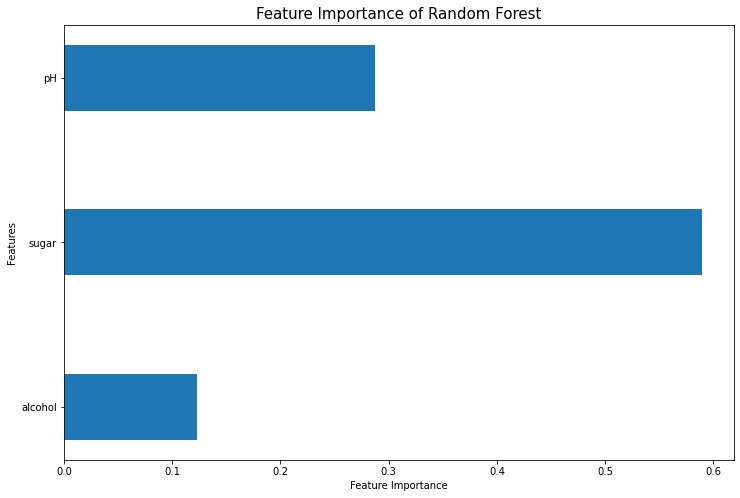

In [18]:
f, ax = plt.subplots(figsize = (12, 8))

plt.barh(['alcohol', 'sugar', 'pH'], rf.feature_importances_, height = 0.4)
plt.title('Feature Importance of Random Forest', fontsize = 15)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.show()

In [19]:
from sklearn.datasets import load_breast_cancer # 위스콘신 유방암 데이터

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target # 우리가 맞춰야할 변수이다.

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
